In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXNlclxEb2N1bWVudHNcR2l0SHViXHByaW1lbnVtYmVyc2FtLmdpdGh1Yi5pb1xhcHBlbmRpeA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp949.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\i

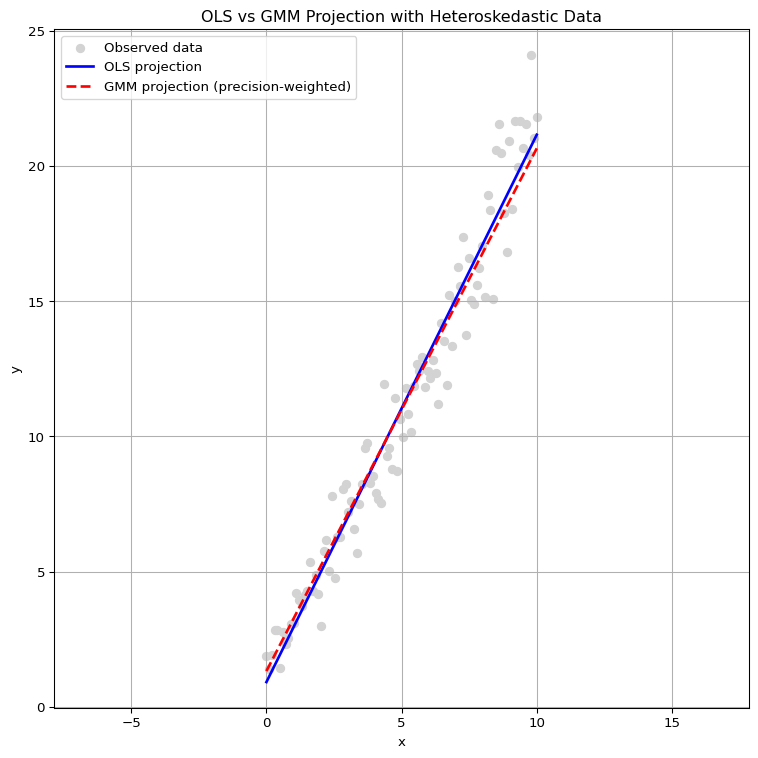

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with heteroskedastic noise (to favor GMM adjustment)
np.random.seed(0)
n = 100
x = np.linspace(0, 10, n)
X = np.vstack([np.ones(n), x]).T

# True model
beta_true = np.array([1, 2])
# Heteroskedastic noise: variance increases with x
noise_std = 0.5 + 1.5 * (x / x.max())  # ranges from 0.5 to 2.0
y = X @ beta_true + np.random.normal(0, noise_std)

# OLS estimation
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat_ols = X @ beta_ols

# GMM weighting: inverse of variance (precision weighting)
W = np.diag(1 / noise_std**2)

# GMM estimation (optimal weighting under heteroskedasticity)
XTWX = X.T @ W @ X
XTWy = X.T @ W @ y
beta_gmm = np.linalg.inv(XTWX) @ XTWy
y_hat_gmm = X @ beta_gmm

# Plot with aspect ratio 1:1
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='lightgray', label='Observed data')
plt.plot(x, y_hat_ols, label='OLS projection', color='blue', linewidth=2)
plt.plot(x, y_hat_gmm, label='GMM projection (precision-weighted)', color='red', linestyle='--', linewidth=2)
plt.title("OLS vs GMM Projection with Heteroskedastic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')  # Set equal aspect ratio
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

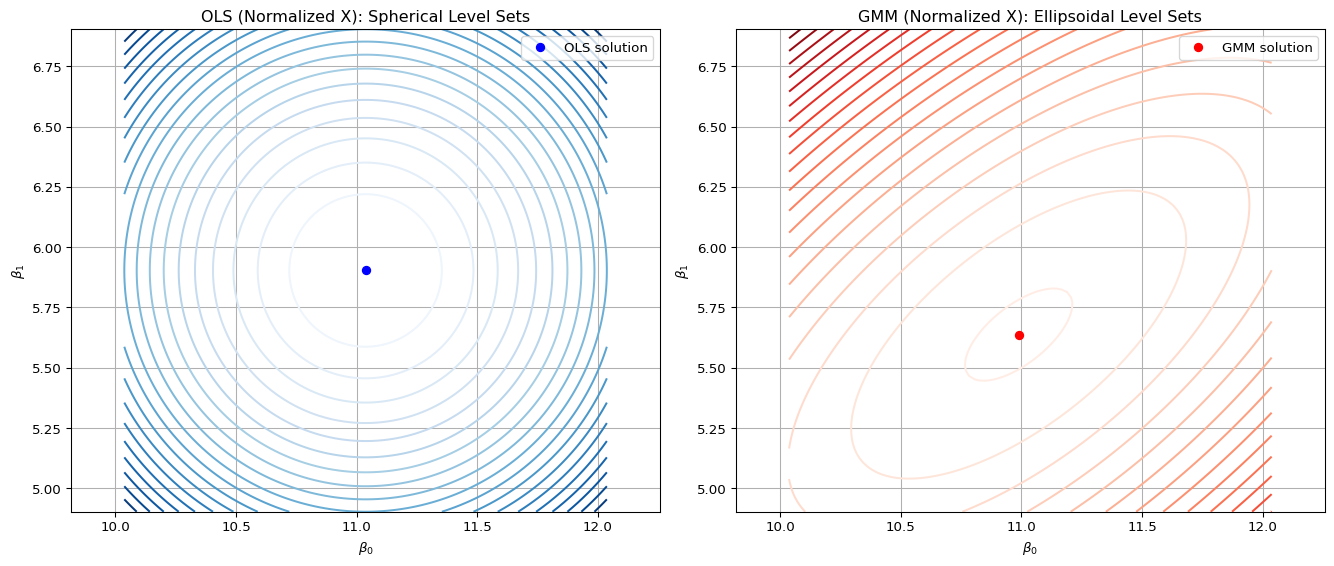

In [3]:
# Z-score normalization of x to improve XtX condition
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1)).flatten()
X_normalized = np.vstack([np.ones(n), x_normalized]).T

# Recalculate OLS and GMM using normalized X
beta_ols_norm = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T @ y
y_hat_ols_norm = X_normalized @ beta_ols_norm

# GMM estimation with same W
XTWX_norm = X_normalized.T @ W @ X_normalized
XTWy_norm = X_normalized.T @ W @ y
beta_gmm_norm = np.linalg.inv(XTWX_norm) @ XTWy_norm
y_hat_gmm_norm = X_normalized @ beta_gmm_norm

# New grid around beta_ols_norm
b0_vals = np.linspace(beta_ols_norm[0] - 1, beta_ols_norm[0] + 1, 100)
b1_vals = np.linspace(beta_ols_norm[1] - 1, beta_ols_norm[1] + 1, 100)
B0, B1 = np.meshgrid(b0_vals, b1_vals)
B_flat = np.vstack([B0.ravel(), B1.ravel()])

# Normalized OLS objective (Mahalanobis)
XtX_inv_norm = np.linalg.inv(X_normalized.T @ X_normalized)
delta_norm = B_flat - beta_ols_norm[:, None]
J_ols_normalized = np.einsum('ji,jk,ki->i', delta_norm, XtX_inv_norm, delta_norm).reshape(B0.shape)

# GMM objective with normalized X
J_gmm_norm = []
for i in range(B_flat.shape[1]):
    r = y - X_normalized @ B_flat[:, i]
    obj = r.T @ W @ r
    J_gmm_norm.append(obj)
J_gmm_norm = np.array(J_gmm_norm).reshape(B0.shape)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Normalized OLS (should be spherical)
cs1 = axs[0].contour(B0, B1, J_ols_normalized, levels=20, cmap='Blues')
axs[0].plot(beta_ols_norm[0], beta_ols_norm[1], 'bo', label='OLS solution')
axs[0].set_title("OLS (Normalized X): Spherical Level Sets")
axs[0].set_xlabel(r"$\beta_0$")
axs[0].set_ylabel(r"$\beta_1$")
axs[0].axis('equal')
axs[0].legend()
axs[0].grid(True)

# GMM with normalized X
cs2 = axs[1].contour(B0, B1, J_gmm_norm, levels=20, cmap='Reds')
axs[1].plot(beta_gmm_norm[0], beta_gmm_norm[1], 'ro', label='GMM solution')
axs[1].set_title("GMM (Normalized X): Ellipsoidal Level Sets")
axs[1].set_xlabel(r"$\beta_0$")
axs[1].set_ylabel(r"$\beta_1$")
axs[1].axis('equal')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()